In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras
# from tensorflow.keras.datasets import mnist
from keras import Sequential
from keras.layers import Input, Flatten, Dense

# import os
# os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" #to hide INFO and WARNING

2026-02-15 07:18:46.032858: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771139926.220870      24 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771139926.271739      24 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771139926.703827      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771139926.703867      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771139926.703870      24 computation_placer.cc:177] computation placer alr

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(f"training data: {x_train.shape} and testing data: {x_test.shape}")
print(f"testing data: {y_train.shape} and testing data: {y_test.shape}")

training data: (60000, 28, 28) and testing data: (10000, 28, 28)
testing data: (60000,) and testing data: (10000,)


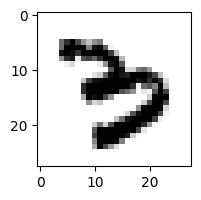

In [4]:
rand_data=x_train[np.random.randint(0,60001)]
plt.figure(figsize=(2,2))
plt.imshow(rand_data, cmap="binary") #imshow: It takes a NumPy array or an array-like object as input and renders it as a raster image

In [5]:
#Now Normalize pixel values of x_train, and x_test: 0-255 -> 0-1
x_train=x_train/255
x_test=x_test/255

**Model 1:** Has 2 hidden layers, each with 16 nodes, and uses the sigmoid function as activation.

In [6]:
model1=Sequential()
model1.add(Input(shape=(28, 28)))
model1.add(Flatten()) # i/p layer
model1.add(Dense(16,activation="sigmoid"))
model1.add(Dense(16,activation="sigmoid"))
model1.add(Dense(10,activation="softmax")) #o/p layer


I0000 00:00:1771139939.307963      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15511 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


**Model 2:** Has 2 hidden layers, each with 16 nodes, and uses the ReLU function as activation.

In [7]:
model2=Sequential()
model2.add(Input(shape=(28, 28)))
model2.add(Flatten())
model2.add(Dense(16,activation="relu"))
model2.add(Dense(16,activation="relu"))
model2.add(Dense(10,activation="softmax"))

**Model 3:** Has 2 hidden layers, each with 64 nodes, and uses the sigmoid function as activation.

In [8]:
model3=Sequential()
model3.add(Input(shape=(28, 28)))
model3.add(Flatten())
model3.add(Dense(64,activation="sigmoid"))
model3.add(Dense(64,activation="sigmoid"))
model3.add(Dense(10,activation="softmax"))

**Model 3:** Has 2 hidden layers, each with 64 nodes, and uses the ReLU function as activation.

In [9]:
model4=Sequential()
model4.add(Input(shape=(28, 28)))
model4.add(Flatten())
model4.add(Dense(64,activation="relu"))
model4.add(Dense(64,activation="relu"))
model4.add(Dense(10,activation="softmax"))

In [10]:
model1.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model2.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model3.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model4.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [11]:
hist_model1=model1.fit(x_train,y_train,batch_size=32,epochs=20,verbose=1,validation_split=0.2)

Epoch 1/20


I0000 00:00:1771139941.983742      67 service.cc:152] XLA service 0x7faa40004670 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1771139941.983784      67 service.cc:160]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1771139942.208297      67 cuda_dnn.cc:529] Loaded cuDNN version 91002


  80/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1006 - loss: 2.4691

I0000 00:00:1771139942.895845      67 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4684 - loss: 1.8204 - val_accuracy: 0.8724 - val_loss: 0.6180
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8751 - loss: 0.5518 - val_accuracy: 0.9054 - val_loss: 0.3582
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9070 - loss: 0.3453 - val_accuracy: 0.9193 - val_loss: 0.2839
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9209 - loss: 0.2828 - val_accuracy: 0.9296 - val_loss: 0.2493
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9301 - loss: 0.2441 - val_accuracy: 0.9323 - val_loss: 0.2315
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9361 - loss: 0.2204 - val_accuracy: 0.9351 - val_loss: 0.2195
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9414 - loss: 0.2047 - val_accuracy: 0.9378 - val_loss: 0.2105
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9458 - loss: 0.1870 - val_accurac

In [12]:
hist_model2=model2.fit(x_train,y_train,batch_size=32, epochs=20, verbose=1,validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7453 - loss: 0.8542 - val_accuracy: 0.9230 - val_loss: 0.2730
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9199 - loss: 0.2766 - val_accuracy: 0.9322 - val_loss: 0.2302
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9346 - loss: 0.2259 - val_accuracy: 0.9403 - val_loss: 0.2081
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9413 - loss: 0.2014 - val_accuracy: 0.9436 - val_loss: 0.1941
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9447 - loss: 0.1838 - val_accuracy: 0.9487 - val_loss: 0.1823
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9501 - loss: 0.1684 - val_accuracy: 0.9475 - val_loss: 0.1810
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9537 - loss: 0.1590 - val_accuracy: 0.9475 - val_loss: 0.1804
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9543 - loss: 0.1522 - 

In [13]:
hist_model3=model3.fit(x_train,y_train,batch_size=32,epochs=20,verbose=1,validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7223 - loss: 1.0812 - val_accuracy: 0.9285 - val_loss: 0.2544
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9296 - loss: 0.2442 - val_accuracy: 0.9471 - val_loss: 0.1891
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9504 - loss: 0.1696 - val_accuracy: 0.9571 - val_loss: 0.1517
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9624 - loss: 0.1285 - val_accuracy: 0.9607 - val_loss: 0.1354
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9672 - loss: 0.1098 - val_accuracy: 0.9658 - val_loss: 0.1189
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9749 - loss: 0.0874 - val_accuracy: 0.9678 - val_loss: 0.1104
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9782 - loss: 0.0757 - val_accuracy: 0.9701 - val_loss: 0.1030
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9816 - loss: 0.0633 - 

In [14]:
hist_model4=model4.fit(x_train,y_train,batch_size=32,epochs=20,verbose=1,validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8494 - loss: 0.5252 - val_accuracy: 0.9465 - val_loss: 0.1842
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9572 - loss: 0.1427 - val_accuracy: 0.9578 - val_loss: 0.1413
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9699 - loss: 0.0984 - val_accuracy: 0.9605 - val_loss: 0.1316
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9773 - loss: 0.0732 - val_accuracy: 0.9703 - val_loss: 0.1017
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9815 - loss: 0.0573 - val_accuracy: 0.9688 - val_loss: 0.1109
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9861 - loss: 0.0451 - val_accuracy: 0.9697 - val_loss: 0.1158
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9875 - loss: 0.0402 - val_accuracy: 0.9730 - val_loss: 0.1044
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9902 - loss: 0.0311 - 

In [15]:
print(f"val_accuracy\nmodel1: {hist_model1.history["val_accuracy"][-1]}\nmodel2: {hist_model2.history["val_accuracy"][-1]}\nmodel3: {hist_model3.history["val_accuracy"][-1]}\nmodel4: {hist_model4.history["val_accuracy"][-1]}")

val_accuracy
model1: 0.9479166865348816
model2: 0.9514166712760925
model3: 0.9729166626930237
model4: 0.9746666550636292


In [16]:
test_hist_model1=model1.evaluate(x_test,y_test,verbose=1,return_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9471 - loss: 0.1775


In [17]:
test_hist_model2=model2.evaluate(x_test,y_test,verbose=1,return_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9439 - loss: 0.2037


In [18]:
test_hist_model3=model3.evaluate(x_test,y_test, verbose=1, return_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9710 - loss: 0.1100


In [19]:
test_hist_model4=model4.evaluate(x_test,y_test,verbose=1, return_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9671 - loss: 0.1587


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


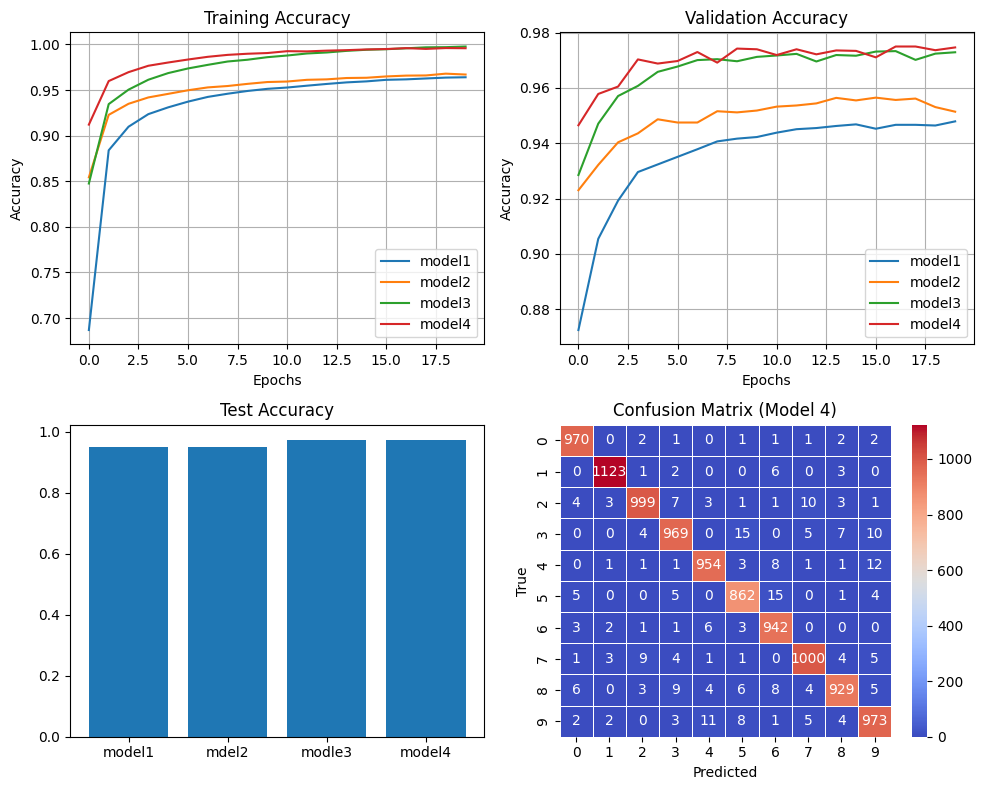

In [20]:
x_pred=model4.predict(x_test)
x_pred_classes=np.argmax(x_pred,axis=1)
#confusion matrix
cm=tensorflow.math.confusion_matrix( labels=y_test, predictions=x_pred_classes, num_classes=10)

fig,axs=plt.subplots(nrows=2, ncols=2, figsize=(10,8))
axs[0,0].set_title("Training Accuracy")
axs[0,0].plot(hist_model1.history["accuracy"],label="model1")
axs[0,0].plot(hist_model2.history["accuracy"],label="model2")
axs[0,0].plot(hist_model3.history["accuracy"],label="model3")
axs[0,0].plot(hist_model4.history["accuracy"],label="model4")
axs[0,0].set_xlabel("Epochs")
axs[0,0].set_ylabel("Accuracy")
axs[0,0].grid(True)
axs[0,0].legend()

axs[0,1].plot(hist_model1.history["val_accuracy"],label="model1")
axs[0,1].plot(hist_model2.history["val_accuracy"],label="model2")
axs[0,1].plot(hist_model3.history["val_accuracy"],label="model3")
axs[0,1].plot(hist_model4.history["val_accuracy"],label="model4")
axs[0,1].set_xlabel("Epochs")
axs[0,1].set_ylabel("Accuracy")
axs[0,1].grid(True)
axs[0,1].legend()
axs[0,1].set_title("Validation Accuracy")

axs[1,0].set_title("Test Accuracy")
axs[1,0].bar(["model1","mdel2","modle3","model4"],[test_hist_model1["accuracy"],test_hist_model2["accuracy"],test_hist_model3["accuracy"],test_hist_model4["accuracy"]],label="model1")

axs[1,1].set_title("Confusion Matrix (Model 4)")
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm",linewidths=.5, ax=axs[1,1]) 
axs[1,1].set_xlabel("Predicted")
axs[1,1].set_ylabel("True")

plt.tight_layout()
plt.show()


Format: True label/Predicted label


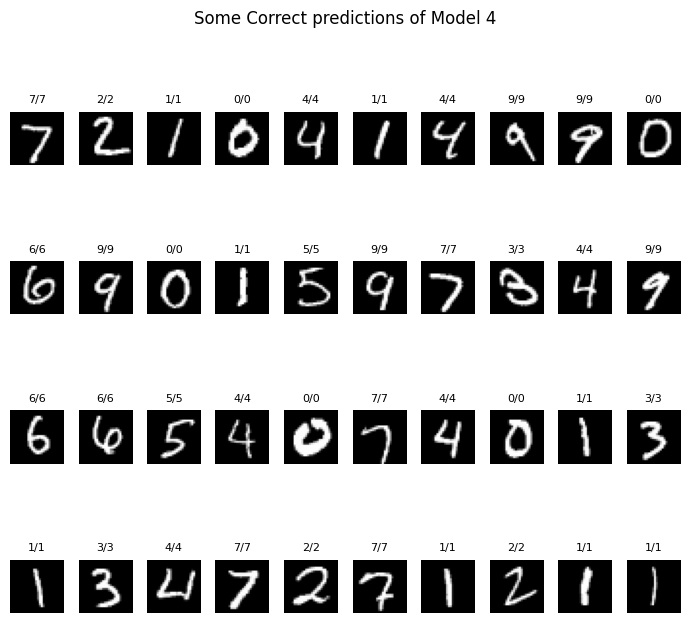

In [21]:
#some correct predictions of Model 4
print("Format: True label/Predicted label")
correct_indices = np.where(x_pred_classes == y_test)[0]
plt.figure(figsize=(7,7))
plt.suptitle("Some Correct predictions of Model 4")
for plot_index in range(40):
    plt.subplot(4,10, plot_index+1)
    plt.imshow(x_test[correct_indices[plot_index]],cmap="grey")
    plt.title(f"{y_test[correct_indices[plot_index]]}/{x_pred_classes[correct_indices[plot_index]]}",fontsize=8)
    plt.axis("off")
plt.tight_layout()
plt.show()

## Saving all models

In [22]:
model1.save("model1.keras")
model2.save("model2.keras")
model3.save("model3.keras")
model4.save("model4.keras")